
### MNIST Tutorial



In [1]:
#tensorflow 호출
import tensorflow as tf

#**Scaling**
데이터들의 간격을 맞추어 주는 scaling 방법은 표준화(standardization)와 정규화(normalization)이 있다.
스케일링을 하는 이유는 각 값들의 편차가 매우 클 경우 비교가 하기 어려우며 값들의 평균 분산 등이 제각각이다. 이것은 학습 성능이 떨어지는 원인이다.
#**표준화(standardization)**
표준화는 입력된 x들의 정규 분포를 평균이 0이고 분산이 1인 표준 정규 분포로 변환하는 것을 의미한다.
#**정규화(normalization)**
정규화는 입력된 x들의 값들을 모두 0과 1 사이의 값으로 변환하는 방식이다.

# **255.0으로 나눈 이유**
x_train과 x_test를 255.0으로 나눈 이유는, 샘플 값을 정수에서 부동소수로 변환한 것이다.
이미지 데이터의 경우 0~255 사이의 색상이 있는 인코딩된 정수가 포함돼있다. 이것을 [0,1] 사이의 부동소수점 배열로 정규화를 하기 위해 각각의 값에 255.0으로 나눈 것이다.

In [3]:
#MNIST 데이터셋
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test/255.0 #255.0으로 나누어 

In [4]:
#model 생성
model = tf.keras.models.Sequential([ 
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(128, activation =  'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [5]:
#model 훈련 및 평가
model.fit(x_train, y_train, epochs = 5)
model.evaluate(x_test, y_test, verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1407 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9764
313/313 - 0s - loss: 0.0750 - accuracy: 0.9794 - 476ms/epoch - 2ms/step


[0.07502580434083939, 0.9793999791145325]

# **기본 이미지 분류**

In [6]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#train_images, train_labels : 훈련 세트(모델 학습에 사용)
#test_images, test_labels : 테스트 세트(모델 테스트에 사용)

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
#데이터셋 클래스 이름 설정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


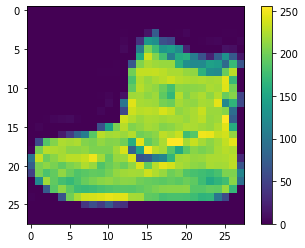

In [11]:
#데이터 전처리
#픽셀 범위 : 0~255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False) #격자 나타내기 false
plt.show()

In [12]:
#정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

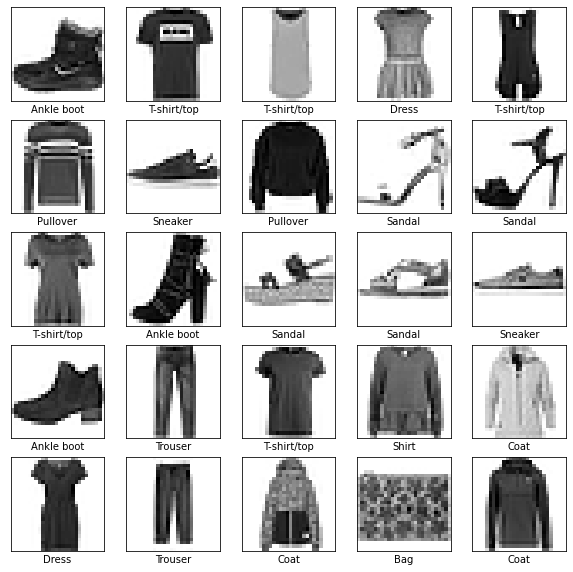

In [20]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([]) #눈금 제거
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary) #plt.cm.binary : 이미지를 회색조로 표시
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Flatten, Dense층의 역할**

**Flatten**

2차원 배열(28*28픽셀)의 이미지 포맷을 28*28*28=784 픽셀의 1차원 픽셀로 변환한다.
이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘린다.
이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다.

**Dense**

Dense층은 밀집연결(densely-connected) 또는 완전연결(fully-connected)층이라고 불린다.
첫 번째 Dense층은 128개의 node를 가진다.
두 번째 층은 10개의 node를 가진 softmax층이다. 이 층은 10개의 확률을 바노한하고 반환된 값의 전체 합은 1이다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다.


In [22]:
#모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

**모델 컴파일**

손실함수(loss) : 훈련 중 모델이 얼마나 정확한지 측정.

옵티마이저(optimizer) : 모델이 인식하는 데이터와 손실 함수를 기반으로 모델이 업데이트 되는 방식

메트릭(metrics) : 훈련 및 테스트 단계를 모니터링



In [24]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [25]:
#모델 훈련
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4997 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3789 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3366 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3106 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

**verbose**

0 : 자동

1 : 진행 표시줄

2: 세대 당 한 라인

In [29]:
#모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3573 - accuracy: 0.8776 - 396ms/epoch - 1ms/step

Test accuracy: 0.8776000142097473


In [30]:
#예측하기
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

predictions[0]

array([1.6759869e-07, 5.3255178e-09, 4.8238298e-09, 2.2180823e-11,
       2.4058559e-07, 2.3034771e-03, 9.4705355e-10, 8.8292714e-03,
       1.2368999e-09, 9.8886687e-01], dtype=float32)

In [32]:
#가장 신뢰도가 높은 레이블
print(np.argmax(predictions[0])) #argmax : 배열에서 가장 큰 값의 인덱스
test_labels[0]

9


9

In [33]:
# 10개 클래스에 대한 예측
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

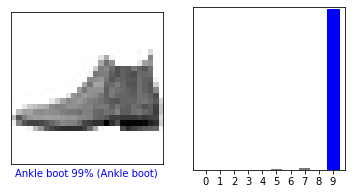

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

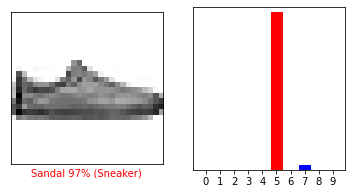

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

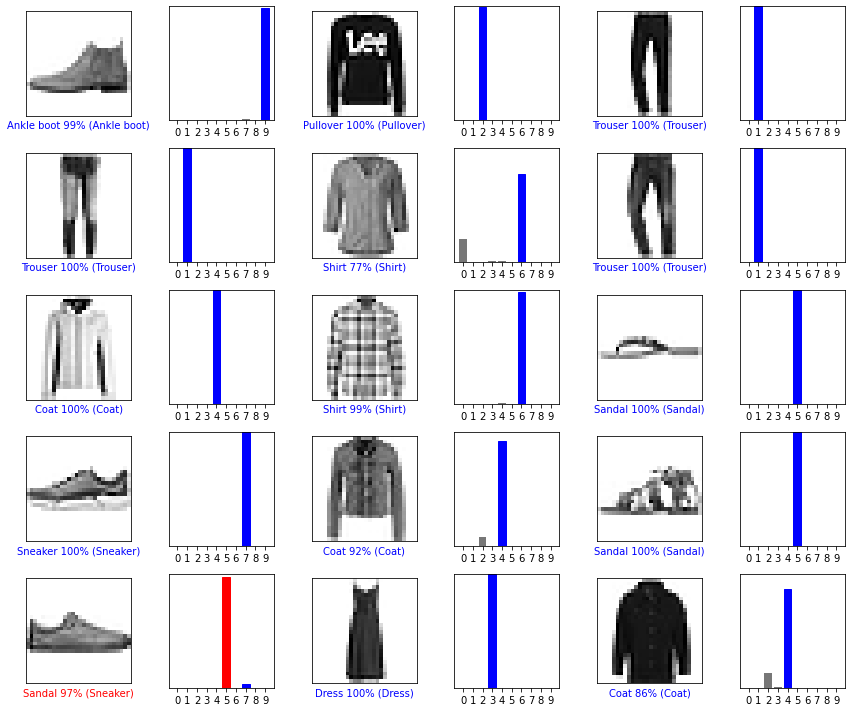

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [37]:
# 훈련된 모델 사용하기
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [38]:
# 2차원 배열로 만들기(하나의 이미지를 사용할 때도 필수)
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [39]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.9418202e-05 1.4911910e-11 9.9828571e-01 1.4013664e-10 1.6370127e-03
  2.8861931e-13 2.7828084e-05 2.9312213e-19 4.8300985e-10 3.1801080e-14]]


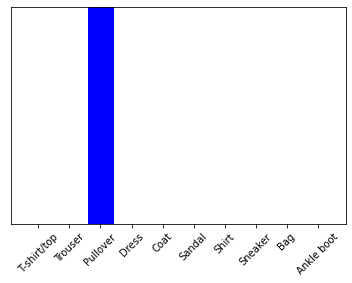

In [40]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [41]:
np.argmax(predictions_single[0])

2